# SVM Classification on Mouse Viral Study Dataset

Task is to train an SVM classifier to predict infection status based on medicine dosages given to mice.

Our goal with SVM is to create the best separating hyperplane. The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

-- determine whether dataset is linearly or non-linearly separable. Which plot method did you use for this task?

-- based on your observation select a linear or nonlinear svm classifier


-- Create a train/test split. Using the train split, train the upon the  datasets using SVM classifier with the k fold cross-validation. Keep aside the test split.

-- Display average confusion matrix after the K fold CV is over.

-- report train fold accuracy and validation fold accuracy for each fold and the average CV accuracy after the K fold. Determine overfitting/underfitting for each model.  

-- Describe in your own words how you determined if there is any under/overfitting.

-- Retrain on the entire train split that you created earlier. Using this trained model, test on the dataset that you kep aside to report generalization performance.

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("mouse_viral_study.csv")
df  


,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [75]:
# Identify and handle any missing data.
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64


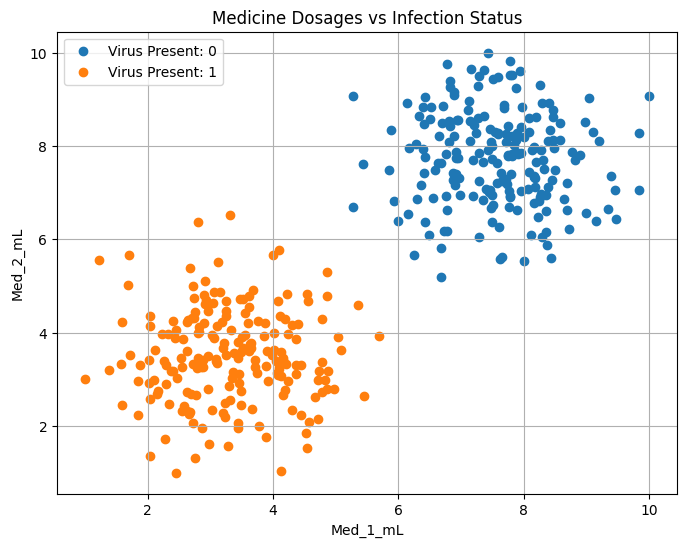

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for label in df['Virus Present'].unique():
    subset = df[df['Virus Present'] == label]
    plt.scatter(subset['Med_1_mL'], subset['Med_2_mL'], label=f'Virus Present: {label}')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.title('Medicine Dosages vs Infection Status')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# Count the number of samples with and without the virus
print("Virus presence counts in the dataset:")
print(df['Virus Present'].value_counts())


Virus presence counts in the dataset:
Virus Present
0    200
1    200
Name: count, dtype: int64


As shown on the graph, this graph shows us our dataset is inearly separable. Based off these observations, I will choose to utilize a linear SVM classifier without needing to use RBF kernel.

In [77]:
# Shuffle the dataset and Split the dataset into 70% train and 30% test.
from sklearn.model_selection import train_test_split

X = df[["Med_1_mL", "Med_2_mL"]]
y = df["Virus Present"]
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True)
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# K-Folds Cross Validation Implementation

In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix

# number of folds
k = 5

# Initialize lists to store predictions and accuracies
train_accuracies = []
val_accuracies = []
conf_matrix = []


In [79]:
import numpy as np

# Create a KFold instance
kf = KFold(n_splits=k, shuffle=True)

# Perform k-fold cross-validation
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    # Split the data into training and test sets
    xtraining, ytraining = X_train_np[train_index], y_train_np[train_index]
    xtesting, ytesting = X_train_np[val_index], y_train_np[val_index]

    # Train the model
    SVC_classifier = SVC(kernel='linear')
    SVC_classifier.fit(xtraining, ytraining)


    # Training accuracy
    y_train_pred = SVC_classifier.predict(xtraining)
    train_acc = accuracy_score(ytraining, y_train_pred)
    train_accuracies.append(train_acc)
    
    # Validation accuracy
    y_val_pred = SVC_classifier.predict(xtesting)
    val_acc = accuracy_score(ytesting, y_val_pred)
    val_accuracies.append(val_acc)

    # Confusion matrix on validation 
    conf_matrix.append(confusion_matrix(ytesting, y_val_pred))

    print(f"Fold {i+1}: Train Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")


Fold 1: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Fold 2: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Fold 3: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Fold 4: Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Fold 5: Train Accuracy = 1.0000, Validation Accuracy = 1.0000


In [80]:
# Average confusion matrix
avg_conf_matrix = np.mean(conf_matrix, axis=0)
print("\nAverage Confusion Matrix across folds:")
print(avg_conf_matrix)

print(f"\nAverage Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Validation Accuracy: {np.mean(val_accuracies):.4f}")


Average Confusion Matrix across folds:
[[29.8  0. ]
 [ 0.  26.2]]

Average Train Accuracy: 1.0000
Average Validation Accuracy: 1.0000


In [81]:
# Determine overfitting/underfitting
print("\nOverfitting/Underfitting assessment:")
if np.mean(train_accuracies) > np.mean(val_accuracies) + 0.05:
    print("Model shows signs of overfitting (training accuracy significantly higher than validation accuracy).")
elif np.mean(train_accuracies) < 0.7 and np.mean(val_accuracies) < 0.7:
    print("Model may be underfitting (both accuracies are low).")
else:
    print("Model appears well balanced (no obvious overfitting or underfitting).")


Overfitting/Underfitting assessment:
Model appears well balanced (no obvious overfitting or underfitting).


In [82]:
# Retrain on full training data
final_model = SVC(kernel='linear')
final_model.fit(X_train_np, y_train_np)

# Test performance on held-out test data
y_test_pred = final_model.predict(X_test.to_numpy())
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"\nTest Set Accuracy: {test_accuracy:.4f}")
print("Test Set Confusion Matrix:")
print(test_conf_matrix)



Test Set Accuracy: 1.0000
Test Set Confusion Matrix:
[[51  0]
 [ 0 69]]
